<a href="https://colab.research.google.com/github/vaibhavbaswal95/ComputerVision/blob/master/Cars196.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
#import statements
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import logging
import sys

In [3]:
tf.__version__

'2.1.0'

In [0]:
#importing tensorflow-dataset
import tensorflow_datasets as tfds

In [5]:
#listing all the available datasets
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [7]:
#Loading dataset
ds_builder = tfds.load('cars196',data_dir="/cars196")

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /cars196/cars196/2.0.0.incomplete3OBYF5/cars196-train.tfrecord


Shuffling and writing examples to /cars196/cars196/2.0.0.incomplete3OBYF5/cars196-test.tfrecord


Dataset cars196 downloaded and prepared to /cars196/cars196/2.0.0. Subsequent calls will reuse this data.


In [8]:
ds_builder['train']

<DatasetV1Adapter shapes: {bbox: (4,), image: (None, None, 3), label: ()}, types: {bbox: tf.float32, image: tf.uint8, label: tf.int64}>

In [9]:
type(ds_builder['train'])

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [0]:
# creating separate train & test datasets
train_dataset,test_dataset = ds_builder['train'],ds_builder['test']

In [14]:
train_dataset.element_spec

{'bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None),
 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}

In [15]:
#lets look at image sizes & labels
for i in train_dataset.take(5):
  print(i['image'].shape,i['label'].numpy())

(361, 421, 3) 194
(474, 800, 3) 182
(452, 640, 3) 190
(373, 500, 3) 124
(1635, 2765, 3) 171


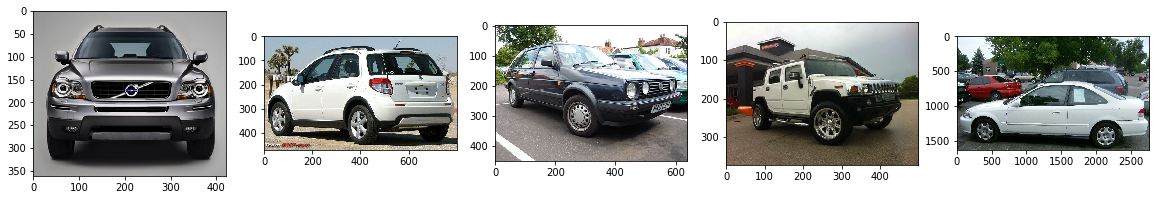

In [16]:
#lets see the ouput of few images
plt.figure(figsize=[20,20])
j=1
for i in train_dataset.take(5):
  plt.subplot(1,5,j)
  plt.imshow(i['image'])
  j+=1

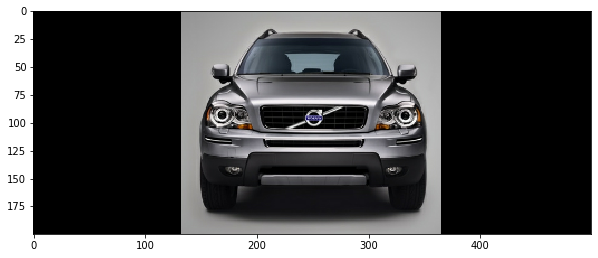

In [17]:
#we see images of different sizes, hence preprocessing is required
plt.figure(figsize=[10,10])
plt.imshow(tf.image.resize_with_pad(image=next(iter(train_dataset))['image']/255,target_height=200,target_width=500))

In [0]:
#Configurations for image preprocessing
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:
##using map function to apply prerpcessing fucntion to every element
#divided by 255 so as to ensure values from 1 to 255 scale in the images
image_dataset = train_dataset.map(lambda x : tf.image.resize_with_pad(x['image']/255,target_height=IMG_HEIGHT,target_width=IMG_WIDTH))
label_dataset = train_dataset.map(lambda x : tf.one_hot(x['label'], depth = 196))


In [164]:
image_dataset.element_spec

TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)

In [165]:
label_dataset.element_spec

TensorSpec(shape=(196,), dtype=tf.float32, name=None)

In [0]:
train_xy = tf.data.Dataset.zip((image_dataset, label_dataset))

In [167]:
train_xy.element_spec

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(196,), dtype=tf.float32, name=None))

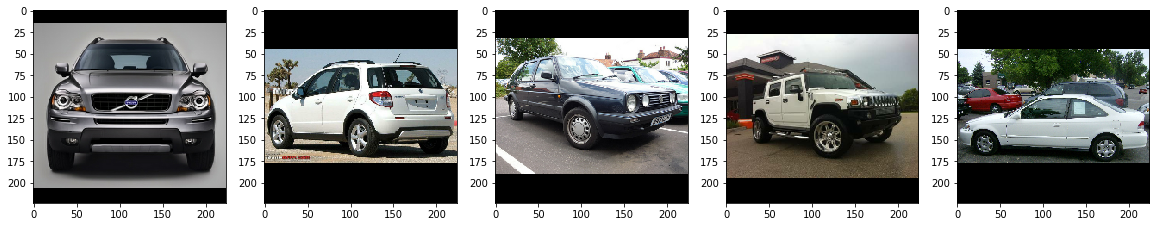

In [168]:
#lets see the ouput of few images
plt.figure(figsize=[20,20])
j=1
for i in train_xy.take(5):
  plt.subplot(1,5,j)
  plt.imshow(i[0])
  j+=1

In [169]:
train_xy.element_spec

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(196,), dtype=tf.float32, name=None))

In [170]:
next(iter(train_xy))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [72]:
import gc
gc.enable()
gc.collect()

1466

In [73]:
224*224*3

150528

In [0]:
train_xy_batch = train_xy.batch(32,drop_remainder=True)

In [172]:
train_xy_batch.element_spec

(TensorSpec(shape=(32, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 196), dtype=tf.float32, name=None))

In [0]:
from tensorflow import keras

In [0]:
inputs = keras.Input(shape=[224, 224, 3], name = 'input')
x = keras.layers.Flatten()(inputs)

In [0]:
x = keras.layers.Dense(500, activation=keras.layers.LeakyReLU(alpha=0.3))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(196,activation='softmax')(x)

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs, name='test_model_2')

In [0]:
model.compile(loss='categorical_crossentropy',
   optimizer=tf.optimizers.RMSprop(lr=1e-4),
   metrics=['accuracy'])

In [185]:
model.summary()

Model: "test_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               75264500  
_________________________________________________________________
dropout_19 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 50)               

In [199]:
model.fit(train_xy_batch,epochs=7)

Epoch 1/7
254/254 [==============================] - 253s 996ms/step - loss: 7.2010 - accuracy: 0.0069
Epoch 2/7
254/254 [==============================] - 253s 996ms/step - loss: 6.7555 - accuracy: 0.0065
Epoch 3/7
254/254 [==============================] - 253s 996ms/step - loss: 6.5859 - accuracy: 0.0078
Epoch 4/7
254/254 [==============================] - 253s 998ms/step - loss: 6.3495 - accuracy: 0.0052
Epoch 5/7
254/254 [==============================] - 252s 992ms/step - loss: 6.2099 - accuracy: 0.0086
Epoch 6/7
254/254 [==============================] - 250s 984ms/step - loss: 6.1383 - accuracy: 0.0062
Epoch 7/7
254/254 [==============================] - 249s 980ms/step - loss: 6.0241 - accuracy: 0.0089
